## Estimating regression fits

* The linear regression is the linear equation that best fits the points.
* TThere is no one way to choose the bestfittingg line, the most common one is the ordinary least squares (OLS)
*  The` linear regressio`n describes the` relationship betwee`n the` dependent variable (Y`) and the` independent variables (X`)
* 
The linear regression model calculates th**e dependent variable (D**V) based on th**e independent variables (IV, predictor**s).

*  Linear regression formula:
  
$y^  = b_0 + b_1*X$

* `b0` - the y-intercept, where the line crosses the y-axis.
* `
b `1 - the slope, describes the line's direction and incline

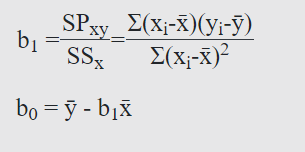.

In [5]:
import numpy as np
import pandas as pd 

In [6]:
sft_X = np.array([750,650,350,800,1500,1050])
price_house_Y = np.array([15000,13000,10000,18000,25000,20000])

In [7]:
X_bar_mean = np.mean(sft_X)
X_bar_mean

850.0

In [8]:
Y_bar_mean = np.mean(price_house_Y)
Y_bar_mean

16833.333333333332

In [9]:
sp_xy = sum((sft_X-X_bar_mean)*(price_house_Y-Y_bar_mean))
sp_xy

10250000.000000002

In [10]:
ssx = sum((sft_X-X_bar_mean)**2)
ssx

765000.0

In [11]:
b1 = sp_xy/ssx
b1

13.398692810457518

In [12]:
b0 = Y_bar_mean - (b1*X_bar_mean)
b0

5444.444444444442

In [13]:
new_x = int(input("No of SQF nead for your Home:"))

No of SQF nead for your Home: 10


In [14]:
y_hat = b0 + b1*new_x

In [15]:
y_hat

5578.4313725490165

In [16]:
def linearReg(X,Y,new_x):
    X_bar_mean = np.mean(X)
    Y_bar_mean = np.mean(Y)
    sp_xy = sum((X-X_bar_mean)*(Y-Y_bar_mean))
    ssx = sum((sft_X-X_bar_mean)**2)
    b1 = sp_xy/ssx
    b0 = Y_bar_mean - (b1*X_bar_mean)
    y_hat = b0 + (b1* new_x)
    print(y_hat)

In [17]:
tips  = pd.read_csv("Datasets/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
x = np.array(tips.total_bill)

In [19]:
y = np.array(tips.tip)

In [20]:
linearReg(500,y,500)

2.99827868852459


### Functions for drawing linear regression models
* The two functions that can be used to visualize a linear fit are regplot() and lmplot().
* In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:


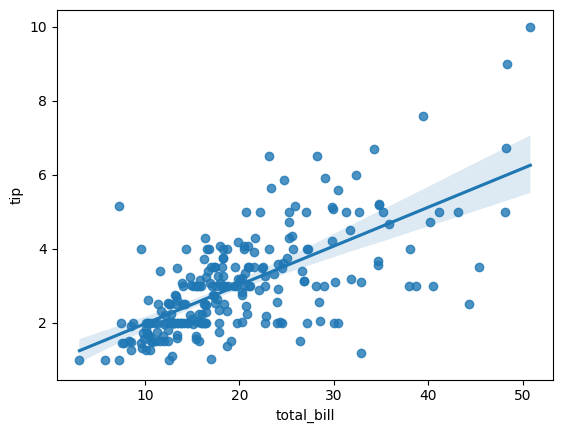

In [21]:
import seaborn as sns
sns.regplot(x="total_bill", y="tip", data=tips);

* These functions draw similar plots, but regplot() is an axes-level function, and lmplot() is a figure-level function. Additionally, regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas.
* Series objects, or as references to variables in a pandas.DataFrame object passed to data.

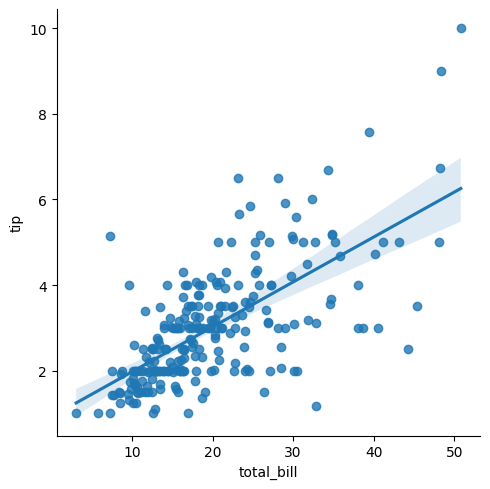

In [22]:
sns.lmplot(x="total_bill", y="tip", data=tips);

In [23]:
* The core functionality is otherwise similar, though, so this tutorial will focus on lmplot():.
* It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

SyntaxError: invalid syntax (3786316265.py, line 1)

In [ ]:
sns.lmplot(x="size", y="tip", data=tips);

* One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 
* Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

* One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 
* Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [ ]:
anscombe = pd.read_csv("Datasets/anscombe.csv")
anscombe.head()

### Fitting different kinds of models

* The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. 
*  The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. 
* For example, in the first case, the linear regression is a good model:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

* The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

* In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),order=2,
           ci=None, scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),order=3,
           ci=None, scatter_kws={"s": 80});

* A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),  # A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under
           ci=None, scatter_kws={"s": 80});

* In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

In [ ]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
tips

* When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

In [ ]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

* The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

In [ ]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

* Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well).
* As the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).
* An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True, line_kws={"color": "C1"});

* The `residplot()` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. 
* It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

In [ ]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

* If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

In [ ]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

### Conditioning on other variables
* The plots above show many ways to explore the relationship between a pair of variables.
* Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?”
* This is where the main differences between `regplot()` and `lmplot()` appear. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to show multiple fits using hue mapping or faceting.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

In [25]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


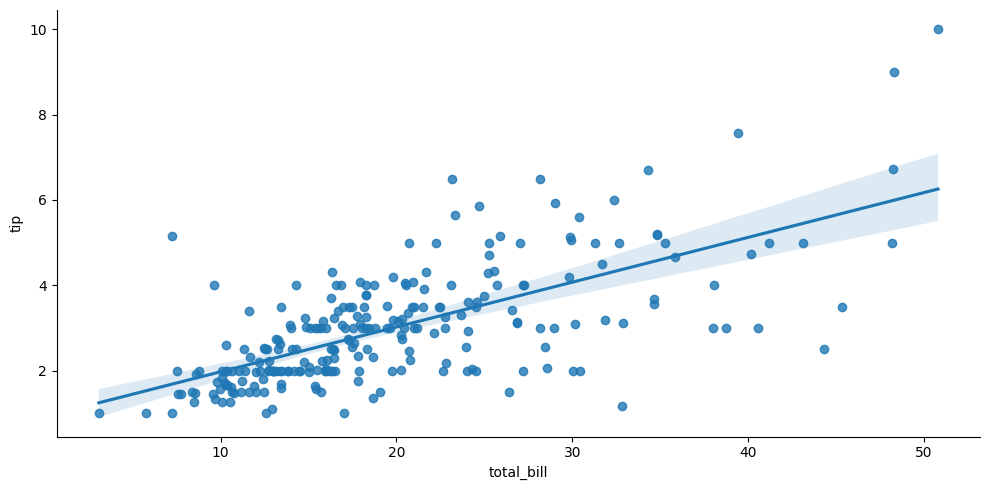

In [28]:
sns.lmplot(data=tips, x = 'total_bill', y = 'tip',aspect=2)

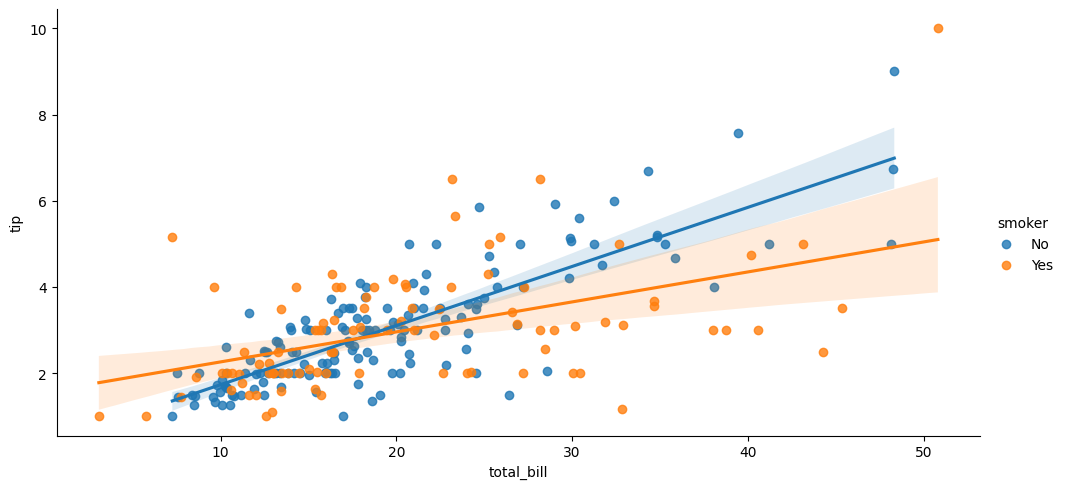

In [29]:
sns.lmplot(data=tips, x = 'total_bill', y = 'tip',aspect=2,hue='smoker')

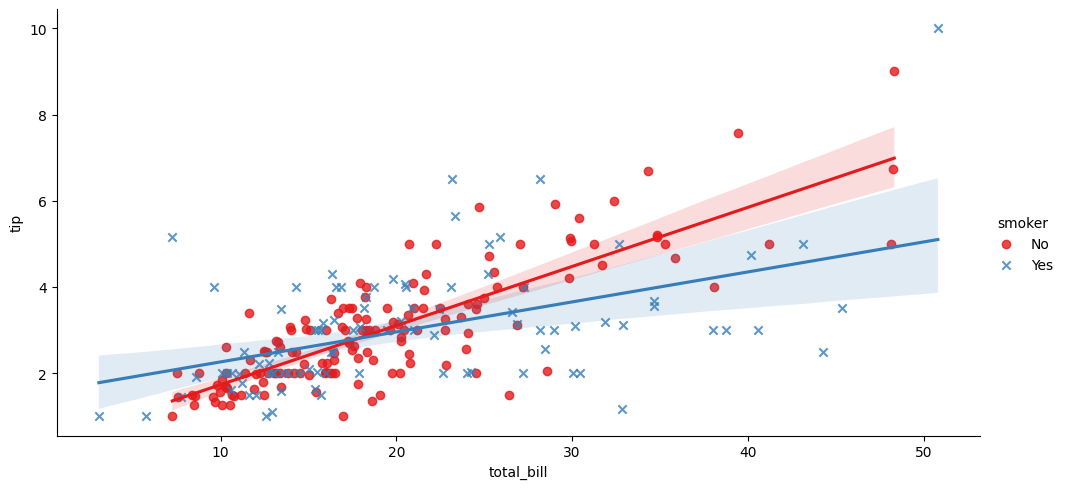

In [31]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,aspect=2,
           markers=["o", "x"], palette="Set1");

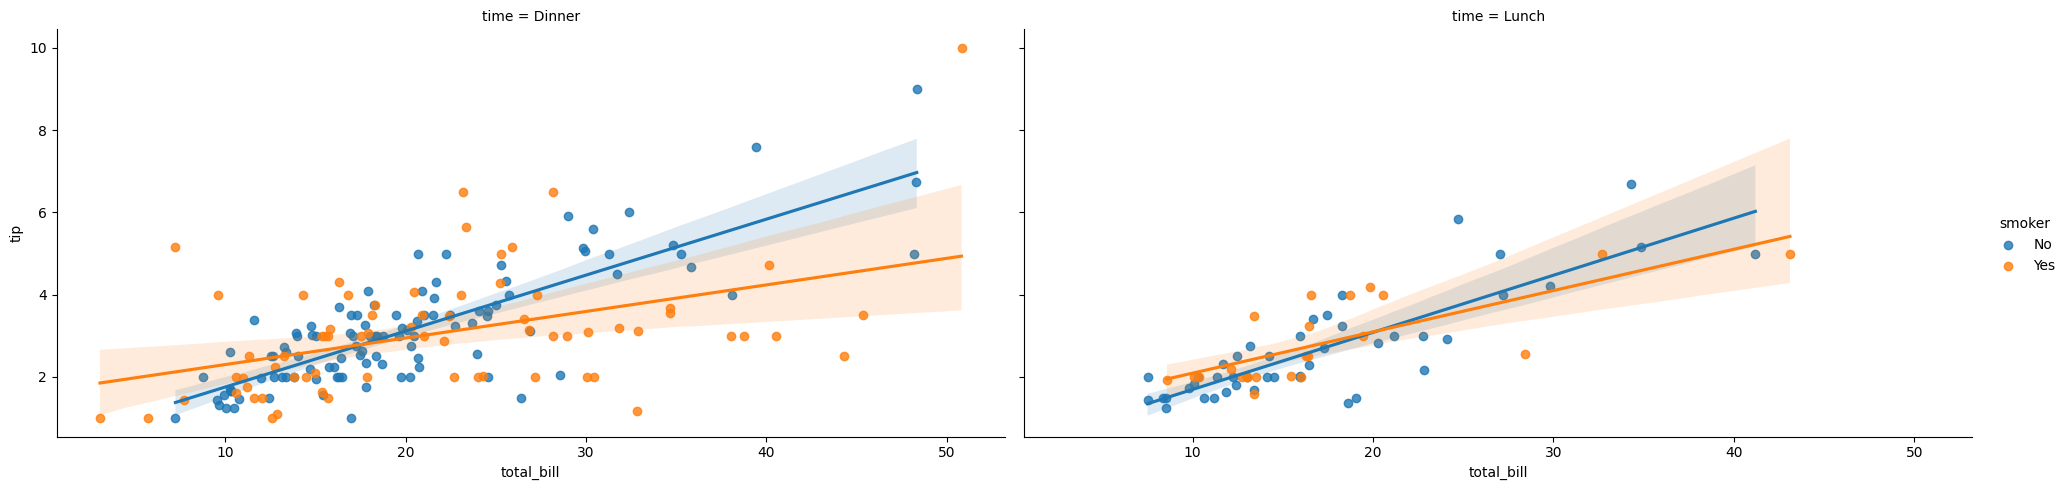

In [32]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips,aspect=2);

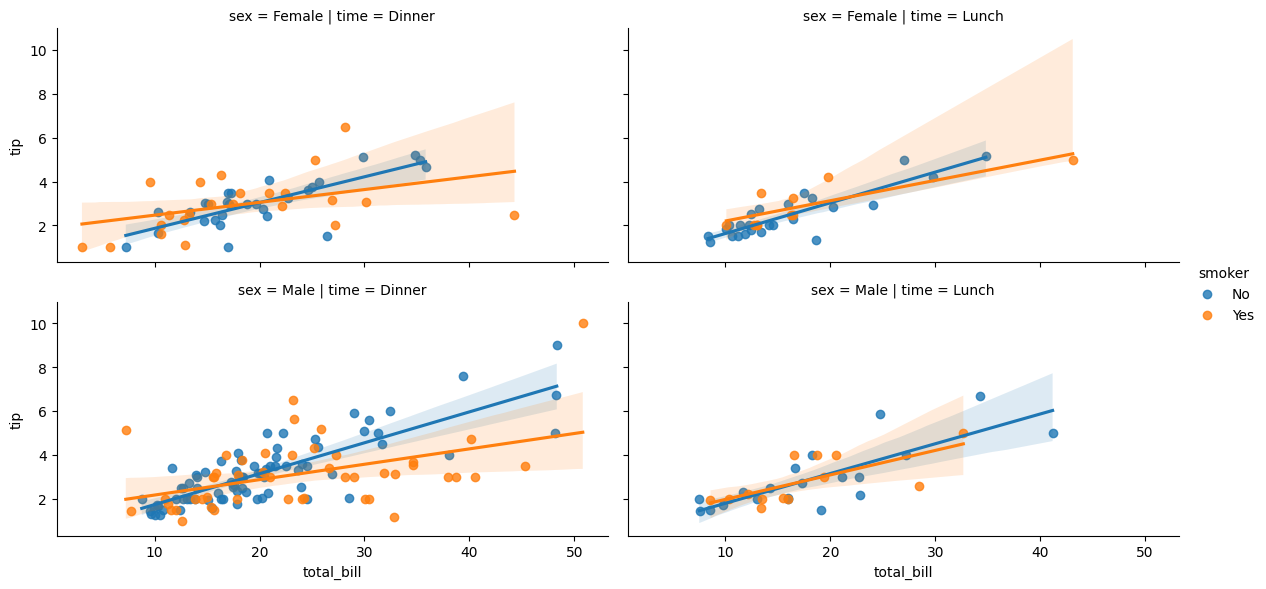

In [33]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",aspect=2,
           col="time", row="sex", data=tips, height=3);

### Plotting a regression in other contexts

* A few other seaborn functions use regplot() in the context of a larger, more complex plot.
* The first is the jointplot() function that we introduced in the distributions tutorial.
* In addition to the plot styles previously discussed, jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg"

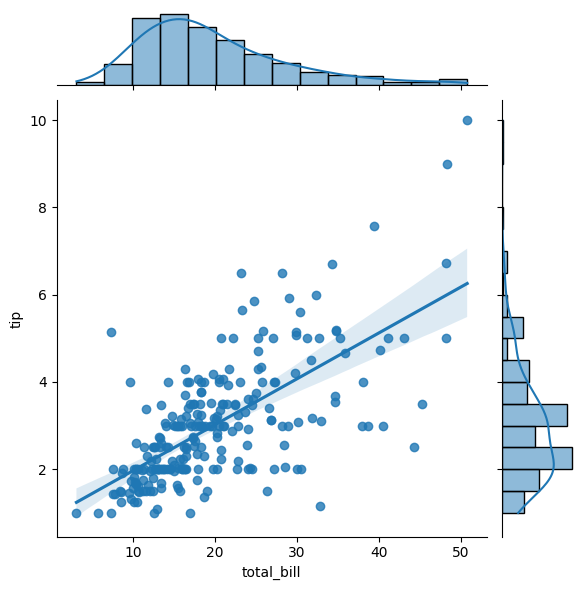

In [34]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='reg')

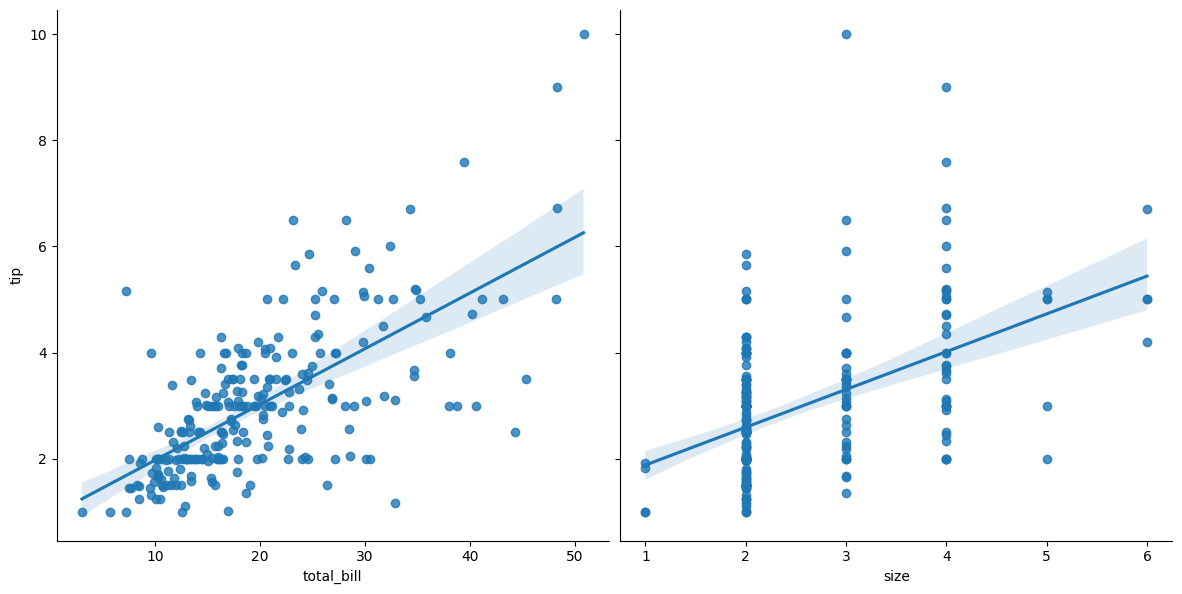

In [45]:
sns.pairplot(tips,x_vars=['total_bill','size'],y_vars=['tip'],aspect=1,height=6,kind='reg')

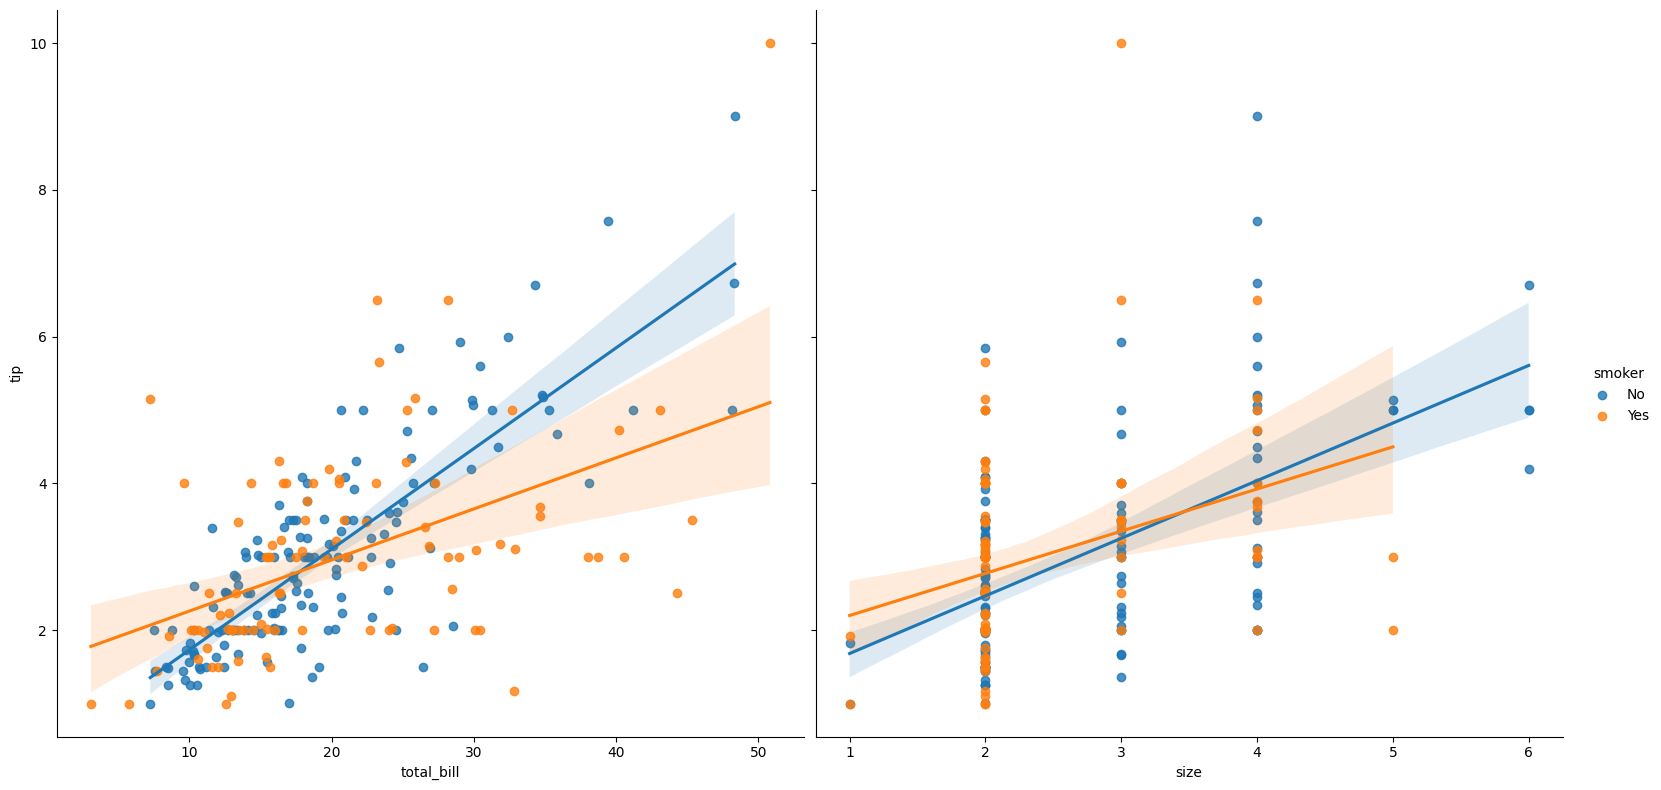

In [50]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=8, aspect=1, kind="reg");

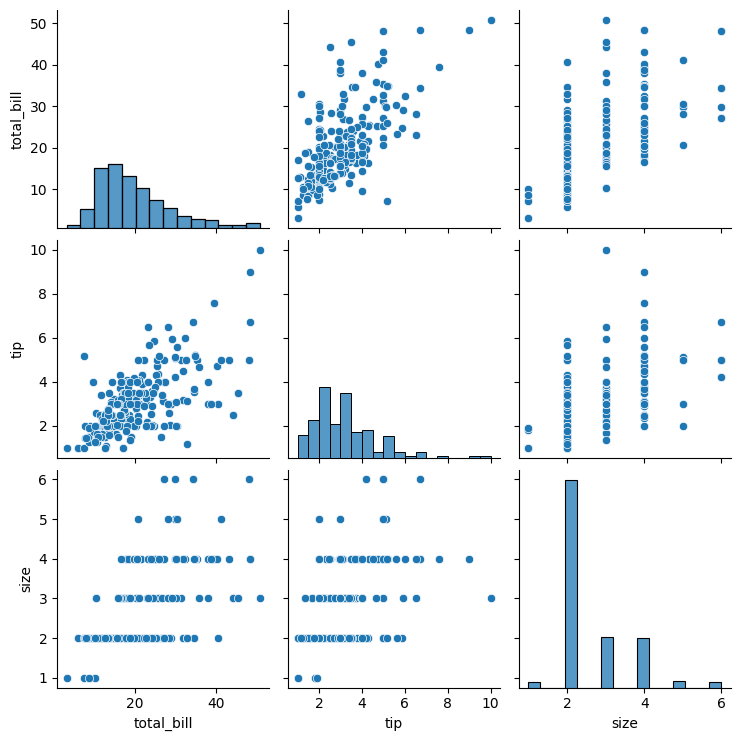

In [51]:
sns.pairplot(tips)